# Machine Learning from Disaster

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
zip_file_path = 'Titanic Dataset.zip'
extracted_folder = 'Titanic_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)  # Extract to the folder

# Load the Titanic CSV into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'Titanic.csv')
df = pd.read_csv(csv_file_name)

# Display the first few rows of the dataset
print(df.head())

   PassengerId  Pclass             Name     Sex  Age  SibSp  Parch  \
0            1       3     Allison Hill    male   17      4      2   
1            2       1      Noah Rhodes    male   60      2      2   
2            3       3  Angie Henderson    male   64      0      0   
3            4       3    Daniel Wagner    male   35      4      0   
4            5       1  Cristian Santos  female   70      0      3   

                                 Ticket    Fare Embarked  Survived  
0  43d75413-a939-4bd1-a516-b0d47d3572cc  144.08        Q         1  
1  6334fa2a-8b4b-47e7-a451-5ae01754bf08  249.04        S         0  
2  61a66444-e2af-4629-9efb-336e2f546033   50.31        Q         1  
3  0b6c03c8-721e-4419-afc3-e6495e911b91  235.20        C         1  
4  436e3c49-770e-49db-b092-d40143675d58  160.17        C         1  


In [3]:
# Data Exploration

In [4]:
# Display basic statistics
print(df.describe())

# Check for null values in the dataset
print(df.isnull().sum())

# Display data types and non-null counts
print(df.info())

# Explore the unique values in some columns
print("Unique values in 'Sex' column before cleaning:", df['Sex'].unique())
print("Unique values in 'Embarked' column before cleaning:", df['Embarked'].unique())

       PassengerId       Pclass          Age        SibSp        Parch  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000     1.964000    38.458000     2.032000     2.005000   
std     288.819436     0.820596    23.103723     1.424431     1.410306   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%     250.750000     1.000000    19.000000     1.000000     1.000000   
50%     500.500000     2.000000    36.500000     2.000000     2.000000   
75%     750.250000     3.000000    59.000000     3.000000     3.000000   
max    1000.000000     3.000000    79.000000     4.000000     4.000000   

              Fare     Survived  
count  1000.000000  1000.000000  
mean    247.968650     0.492000  
std     139.301211     0.500186  
min      10.020000     0.000000  
25%     126.295000     0.000000  
50%     246.500000     0.000000  
75%     365.662500     1.000000  
max     499.780000     1.000000  
PassengerId    0
Pclass    

In [5]:
# Data Cleaning

In [6]:
# Fill missing values for numerical columns with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing values in 'Embarked' (before one-hot encoding)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Now apply one-hot encoding to 'Embarked' (C, Q, S)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Verify the columns after encoding
print("Columns after encoding:", df.columns)

# Drop rows with missing values in the 'Sex' column (if any)
df.dropna(subset=['Sex'], inplace=True)

# Convert 'Sex' into numerical values (male -> 0, female -> 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (like Name, Ticket, PassengerId)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')

# Check the cleaned dataset
print("Cleaned dataset:")
print(df.head())

Columns after encoding: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Survived', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Cleaned dataset:
   Pclass  Sex  Age  SibSp  Parch    Fare  Survived  Embarked_Q  Embarked_S
0       3    0   17      4      2  144.08         1        True       False
1       1    0   60      2      2  249.04         0       False        True
2       3    0   64      0      0   50.31         1        True       False
3       3    0   35      4      0  235.20         1       False       False
4       1    1   70      0      3  160.17         1       False       False


In [7]:
# Data Visualization

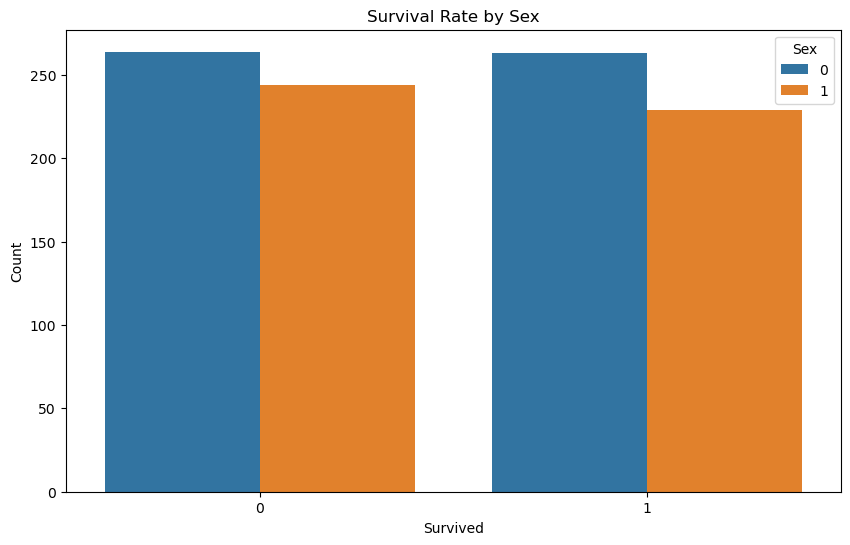

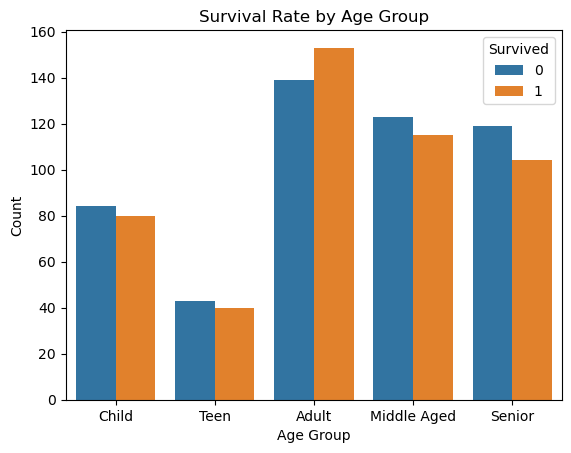

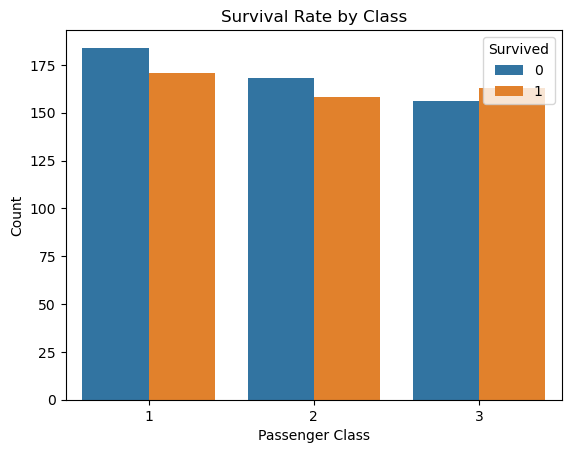

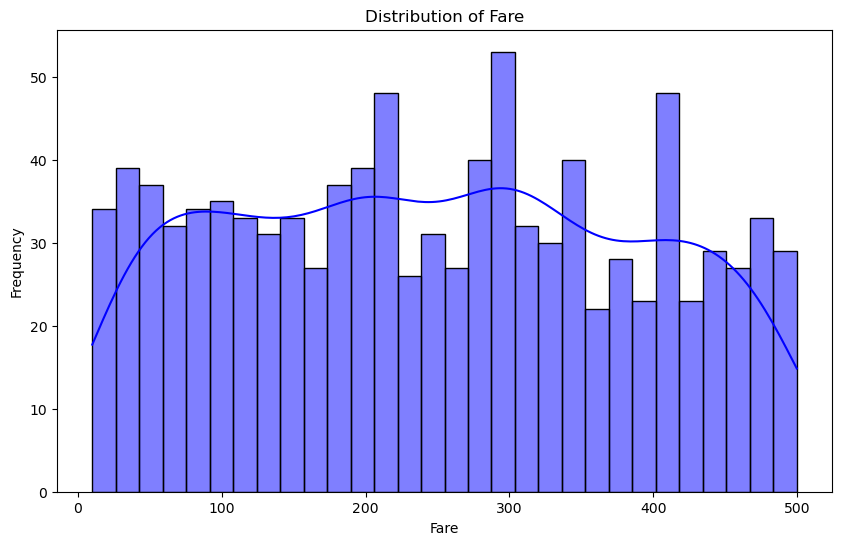

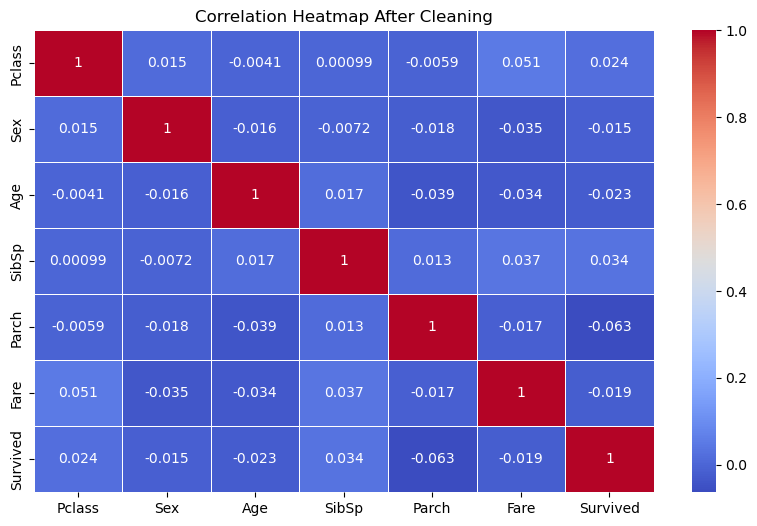

In [8]:
# Set up the figure for plotting
plt.figure(figsize=(10, 6))

# Plot Survival Rate by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot Survival Rate by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Plot Survival Rate by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot distribution of fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, color='blue', bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Step 5: Calculate correlation matrix (Exclude non-numeric columns)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_df.corr()  # Compute the correlation matrix for numeric data

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Cleaning')
plt.show()

In [9]:
# Model Training

In [10]:
# Define features (X) and target (y)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.555
Confusion Matrix:
[[62 44]
 [45 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       106
           1       0.53      0.52      0.52        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200



C:\Users\milto\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Scaling and Increased Iterations

In [13]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with more iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.56
Confusion Matrix:
[[63 43]
 [45 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       106
           1       0.53      0.52      0.53        94

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200

